# Temp for Data Point

In [ ]:
import ee
!pip install geemap
import geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 14.2 MB/s 
     |████████████████████████████████| 3.7 MB 38.8 MB/s 
     |████████████████████████████████| 3.5 MB 33.2 MB/s 
     |████████████████████████████████| 130 kB 51.0 MB/s 
     |████████████████████████████████| 1.2 MB 32.7 MB/s 
     |████████████████████████████████| 1.3 MB 49.6 MB/s 
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 98 kB 3.8 MB/s 
     |████████████████████████████████| 99 kB 4.6 MB/s 
     |████████████████████████████████| 46 kB 1.5 MB/s 
     |████████████████████████████████| 198 kB 12.7 MB/s 
     |████████████████████████████████| 128 kB 13.7 MB/s 
     |████████████████████████████████| 1.6 MB 8.0 MB/s 
     |████████████████████████████████| 79 kB 4.2 MB/s 
  Created wheel for ee-extra: filename=ee_extra-0.0.14-py3-none-any.whl size=209116 sha256=0993b30dc

In [ ]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=H74V_KrvQ0N5A2gkluMcsioI7S5Nav0-W87c-0PjoF0&tc=sHmMb4lkkNvUbaE0hCMBPqQAuvCF-juWHt2oyAAE0no&cc=EuZi739Gy7YuibBw9fZ-b4Mb15oyFO0BnRp4w7rzJys

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfgeXvuGnu2FfN_qSYeqiPGKOWmjXWqF0Ao084EwdknOVAtA0Xcx-jqOljg

Successfully saved authorization token.


# Python Code

In [ ]:
import csv
temps = []
featureCollect = []


dataset = ee.ImageCollection("ECMWF/ERA5_LAND/HOURLY");

visualization = {
  'bands': ['temperature_2m','potential_evaporation','soil_temperature_level_1','surface_pressure','skin_reservoir_content'],
  'min': 250.0,
  'max': 320.0,
  'palette': [
    "#000080","#0000D9","#4000FF","#8000FF","#0080FF","#00FFFF",
    "#00FF80","#80FF00","#DAFF00","#FFFF00","#FFF500","#FFDA00",
    "#FFB000","#FFA400","#FF4F00","#FF2500","#FF0A00","#FF00FF",
  ]
};

# Map.setCenter(22.2, 21.2, 0);

# Map.addLayer(dataset, visualization, "Air temperature [K] at 2m height");

#create list to add temperature values to

count2=0
with open('locations.csv', 'r') as file:
  reader = csv.reader(file)
  next(reader)
  for row in reader:
      coord1 = row[1] #latitude
      coord2 = row[2] #longitude
      coord1=float(coord1)
      coord2=float(coord2)
      csvdate=row[0][0:13].replace(" ","T")
      geom = ee.Geometry.Point([coord1, coord2])
      # Map.addLayer(geom)
      date = ee.Date(csvdate)
      feature = ee.Feature(geom, {'date': csvdate})
      featureCollect.append(feature)
      count2+=1
      if count2>4999:
        break

    # fields = ['temperature_2m']
    # temp2 = dataset.select(fields).filterDate(date).first().reduceRegion(reducer= ee.Reducer.first(), geometry= geom, scale=30)
    # temps.append(temp2) #add temperate to list



ee_feats = ee.FeatureCollection(featureCollect)

def get_values(feature):

  geom=feature.geometry()
  date=ee.Date(feature.get('date'))
  fields = ['temperature_2m','potential_evaporation','soil_temperature_level_1','surface_pressure','skin_reservoir_content']
  era=dataset.select(fields).filterDate(date).first().reduceRegion(reducer= ee.Reducer.first(), geometry= geom, scale=30)
  feature=feature.set(era)

  return feature


ee_feats =ee_feats.map(get_values)
ee_feats2 = ee_feats.map(get_values)
#now we can perform calculations on the list of temperatures

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=geemap.ee_to_pandas(ee_feats,col_names=['date','temperature_2m','potential_evaporation','soil_temperature_level_1','surface_pressure','skin_reservoir_content'])
count=0
while count<100000:
  ee_feats=ee_feats.map(get_values)
  df=df.append(geemap.ee_to_pandas(ee_feats,col_names=['date','temperature_2m','potential_evaporation','soil_temperature_level_1','surface_pressure','skin_reservoir_content']))
  df = df.dropna()
  count+=5000


Exception: ignored

In [ ]:
df


,date,temperature_2m,potential_evaporation,soil_temperature_level_1,surface_pressure,skin_reservoir_content
731,2016-04-19T14,304.978455,-0.004715,305.214035,98933.070312,0.000003
732,2016-04-19T14,304.978455,-0.004715,305.214035,98933.070312,0.000003
733,2016-04-19T14,304.978455,-0.004715,305.214035,98933.070312,0.000003
734,2016-04-19T14,304.978455,-0.004715,305.214035,98933.070312,0.000003
735,2016-04-19T14,304.978455,-0.004715,305.214035,98933.070312,0.000003
...,...,...,...,...,...,...
1028,2016-05-07T21,296.789017,-0.007167,298.612747,95900.691406,0.000014
1029,2016-05-07T22,296.604355,-0.007199,298.427551,95981.062500,0.000014
1030,2016-05-08T05,296.116104,-0.000158,297.833618,95757.507812,0.000045
1031,2016-05-08T06,296.262222,-0.000195,297.875061,95839.367188,0.000047


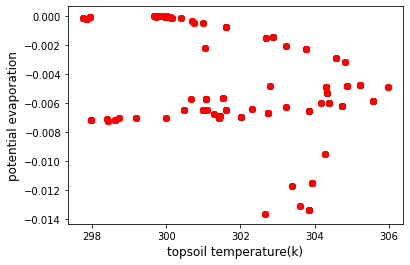

In [ ]:

plt.scatter(df.soil_temperature_level_1, df.potential_evaporation, alpha=0.2,color="red")
plt.ylabel('potential evaporation', fontsize=12)
plt.xlabel('topsoil temperature(k)', fontsize=12)
plt.show()

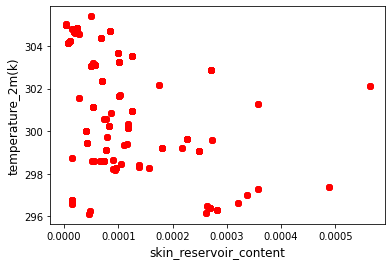

In [ ]:
plt.scatter(df.skin_reservoir_content, df.temperature_2m, alpha=0.2,color="red")
plt.ylabel('temperature_2m(k)', fontsize=12)
plt.xlabel('skin_reservoir_content', fontsize=12)
plt.show()

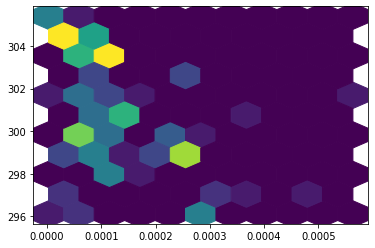

In [ ]:
plt.hexbin(df.skin_reservoir_content, df.temperature_2m, C=None, gridsize=10, bins=None, xscale='linear', yscale='linear', extent=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors='face', mincnt=None, marginals=False, data=None, )

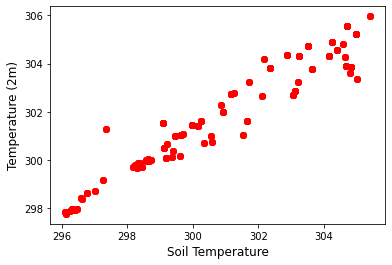

In [ ]:
plt.scatter(df.temperature_2m, df.soil_temperature_level_1, alpha = .2, color = "red")
plt.ylabel('Temperature (2m)', fontsize=12)
plt.xlabel('Soil Temperature', fontsize=12)
plt.show()

<BarContainer object of 2736 artists>

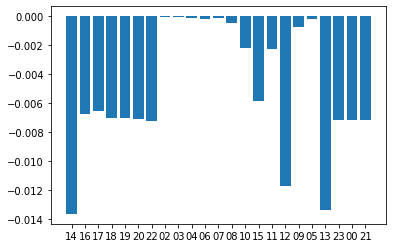

In [ ]:
df2= df.dropna()
df2.date=df2['date'].str[11:13]
plt.bar(df2.date,df2.potential_evaporation)

#dataset2 = ee.ImageCollection("ECMWF/ERA5_LAND/HOURLY").filter(ee.Filter.date('2016-03-29', '2016-04-05'));
#dataset2
#plt.bar(date, df.temperature_2m)

<BarContainer object of 2888 artists>

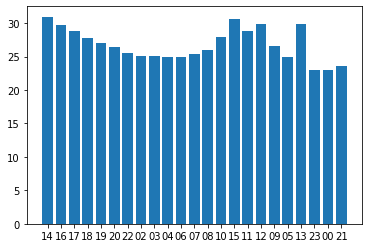

In [ ]:
plt.bar(df2.date,df2.soil_temperature_level_1-275)


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


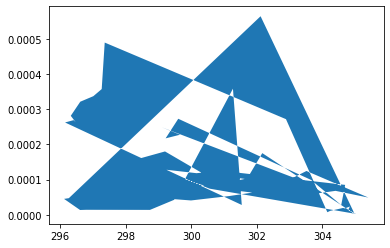

In [ ]:
df2.date=df2['date'].str[11:13]
plt.fill(df2.temperature_2m,df2.skin_reservoir_content)

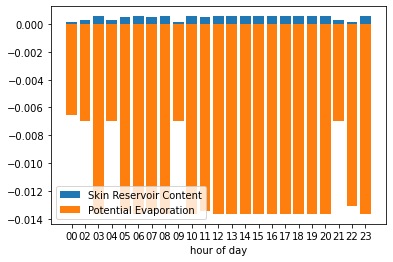

In [ ]:
plt.bar(sorted(df2.date),df2.skin_reservoir_content,label='Skin Reservoir Content')
plt.bar(sorted(df2.date),df2.potential_evaporation,label= 'Potential Evaporation')
plt.xlabel('hour of day')
plt.legend()
plt.show()

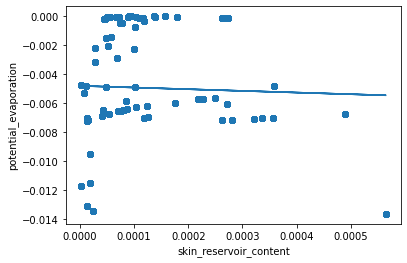

In [ ]:
plt.scatter(df2.skin_reservoir_content,df2.potential_evaporation)
plt.xlabel('skin_reservoir_content')
plt.ylabel('potential_evaporation')
a,b = np.polyfit(df2.skin_reservoir_content,df2.potential_evaporation,1)
plt.plot(df2.skin_reservoir_content,a*df2.skin_reservoir_content+b)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2331396460>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f2331396280>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f2331396340>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f2331396880>}

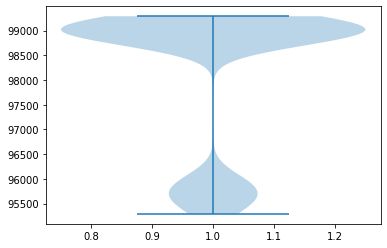

In [ ]:
plt.violinplot(df2.surface_pressure)


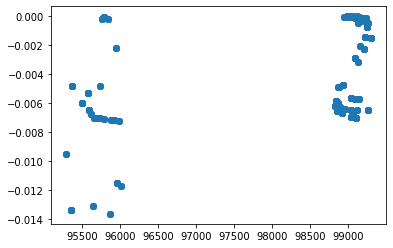

In [ ]:
plt.scatter(df2.surface_pressure,df2.potential_evaporation,alpha=.2)